**Dataset Source**- https://zenodo.org/records/3941387 
The dataset is about mental health and has 104 files with unique mental problems. It is a combination of around 10M reddit posts that are posted within a certain amount of period. 

In [1]:
import pandas as pd
import os

# Set the path to your directory
drive_path = 'D:/Dissertation/Reddit dataset(Final)/'

# Create an empty DataFrame to hold the merged data
merged_df = pd.DataFrame()

# List of file names for your datasets
file_names = ['COVID19_support_post_features_tfidf_256.csv', 'EDAnonymous_2019_features_tfidf_256.csv', 'EDAnonymous_post_features_tfidf_256.csv', 'addiction_2018_features_tfidf_256 (1).csv', 'addiction_2019_features_tfidf_256.csv', 'addiction_post_features_tfidf_256.csv', 'adhd_2019_features_tfidf_256.csv', 'adhd_post_features_tfidf_256.csv', 'alcoholism_2018_features_tfidf_256.csv', 'alcoholism_2019_features_tfidf_256.csv', 'alcoholism_post_features_tfidf_256.csv', 'alcoholism_pre_features_tfidf_256.csv', 'adhd_2018_features_tfidf_256.csv','adhd_2019_features_tfidf_256.csv', 'adhd_post_features_tfidf_256.csv', 'adhd_pre_features_tfidf_256.csv',  'alcoholism_2018_features_tfidf_256.csv', 'alcoholism_2019_features_tfidf_256.csv', 'alcoholism_post_features_tfidf_256.csv','alcoholism_pre_features_tfidf_256.csv', 'autism_2018_features_tfidf_256.csv', 'autism_2019_features_tfidf_256.csv', 'autism_post_features_tfidf_256.csv','autism_pre_features_tfidf_256.csv', 'bipolarreddit_2018_features_tfidf_256.csv', 'bipolarreddit_2019_features_tfidf_256.csv','bipolarreddit_post_features_tfidf_256.csv', 'bipolarreddit_pre_features_tfidf_256.csv', 'bpd_2019_features_tfidf_256.csv',  'bpd_post_features_tfidf_256.csv', 'bpd_pre_features_tfidf_256.csv', 'conspiracy_2018_features_tfidf_256.csv', 'conspiracy_2019_features_tfidf_256.csv', 'conspiracy_post_features_tfidf_256.csv', 'conspiracy_pre_features_tfidf_256.csv', 'depression_2018_features_tfidf_256.csv', 'depression_2019_features_tfidf_256.csv', 'depression_post_features_tfidf_256.csv', 'divorce_2018_features_tfidf_256.csv', 'divorce_2019_features_tfidf_256.csv', 'divorce_post_features_tfidf_256.csv', 'divorce_pre_features_tfidf_256.csv', 'fitness_post_features_tfidf_256 (1).csv', 'fitness_pre_features_tfidf_256.csv', 'guns_2018_features_tfidf_256.csv', 'guns_2019_features_tfidf_256.csv', 'guns_post_features_tfidf_256.csv', 'guns_pre_features_tfidf_256.csv', 'healthanxiety_2018_features_tfidf_256.csv', 'healthanxiety_2019_features_tfidf_256.csv', 'healthanxiety_post_features_tfidf_256.csv', 'healthanxiety_pre_features_tfidf_256.csv', 'jokes_2018_features_tfidf_256.csv', 'jokes_2019_features_tfidf_256.csv', 'jokes_post_features_tfidf_256.csv', 'jokes_pre_features_tfidf_256.csv', 'legaladvice_2018_features_tfidf_256.csv', 'legaladvice_2019_features_tfidf_256.csv', 'legaladvice_post_features_tfidf_256.csv', 'legaladvice_pre_features_tfidf_256.csv', 'lonely_2018_features_tfidf_256.csv', 'lonely_2019_features_tfidf_256.csv', 'lonely_post_features_tfidf_256.csv', 'lonely_pre_features_tfidf_256.csv', 'meditation_2018_features_tfidf_256.csv', 'meditation_2019_features_tfidf_256.csv', 'meditation_post_features_tfidf_256.csv', 'meditation_pre_features_tfidf_256.csv', 'mentalhealth_2018_features_tfidf_256.csv', 'mentalhealth_2019_features_tfidf_256.csv', 'mentalhealth_post_features_tfidf_256.csv', 'mentalhealth_pre_features_tfidf_256.csv', 'parenting_2018_features_tfidf_256.csv', 'parenting_2019_features_tfidf_256.csv', 'parenting_post_features_tfidf_256.csv', 'parenting_pre_features_tfidf_256.csv', 'personalfinance_2018_features_tfidf_256.csv', 'personalfinance_2019_features_tfidf_256.csv', 'personalfinance_post_features_tfidf_256.csv', 'personalfinance_pre_features_tfidf_256.csv', 'ptsd_2018_features_tfidf_256.csv', 'ptsd_2019_features_tfidf_256.csv', 'ptsd_post_features_tfidf_256.csv', 'ptsd_pre_features_tfidf_256.csv', 'relationships_2018_features_tfidf_256.csv', 'relationships_2019_features_tfidf_256.csv', 'relationships_post_features_tfidf_256.csv', 'relationships_pre_features_tfidf_256.csv', 'schizophrenia_2018_features_tfidf_256.csv', 'schizophrenia_2019_features_tfidf_256.csv', 'schizophrenia_post_features_tfidf_256.csv', 'schizophrenia_pre_features_tfidf_256.csv', 'socialanxiety_2018_features_tfidf_256.csv', 'socialanxiety_2019_features_tfidf_256.csv', 'socialanxiety_post_features_tfidf_256.csv', 'socialanxiety_pre_features_tfidf_256.csv', 'suicidewatch_2018_features_tfidf_256.csv', 'suicidewatch_2019_features_tfidf_256.csv', 'suicidewatch_post_features_tfidf_256.csv', 'suicidewatch_pre_features_tfidf_256.csv', 'teaching_2018_features_tfidf_256.csv', 'teaching_2019_features_tfidf_256.csv', 'teaching_post_features_tfidf_256.csv', 'teaching_pre_features_tfidf_256.csv']

# Define the chunk size (100,000 samples)
chunk_size = int(1e5)

for file_name in file_names:
    file_path = os.path.join(drive_path, file_name)
    # Read CSV, skip bad lines
    df = pd.read_csv(file_path)
    
    # Drop 'author' and 'date' columns
    df = df.drop(columns=['author', 'date'], errors='ignore')
    
    # Calculate the 10% sample size
    sample_size = int(0.1 * len(df))
    
    # Sample 10% of the data
    df_sampled = df.sample(n=sample_size, random_state=42)
    
    # Append to merged DataFrame
    merged_df = pd.concat([merged_df, df_sampled], ignore_index=True)


In [2]:
# Export merged DataFrame
merged_df.to_csv("merged_sampled.csv", index=False)

In [3]:
merged_df.shape

(102667, 348)

In [4]:
merged_df.head()

,subreddit,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,COVID19_support,Lockdown and its psychological effects Ever si...,5.817729,6.335960,6.456593,77.418189,66.875648,9.127634,31.627375,9.075115,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.092962,0.0,0.0,0.168545
1,COVID19_support,"Really struggling here First of all, I want to...",5.139028,6.097563,5.976610,78.692419,68.551570,9.175366,26.974290,9.387100,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,COVID19_support,I don't know what to do anymore I hope this is...,4.959712,5.090824,5.848255,82.384781,68.672131,8.723798,30.474599,8.502166,...,0.0,0.0,0.0,0.197879,0.0,0.0,0.064362,0.0,0.0,0.000000
3,COVID19_support,"My wife is unsure what to do. She's essential,...",2.886667,4.599677,4.167778,86.555000,75.111111,8.133333,24.962963,8.841846,...,0.0,0.0,0.0,0.491855,0.0,0.0,0.159979,0.0,0.0,0.000000
4,COVID19_support,I am scared that my state (Michigan) will get ...,3.016917,4.176588,4.655000,85.436667,73.750000,7.833333,24.583333,8.344100,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.182831


In [5]:
merged_df.columns

Index(['subreddit', 'post', 'automated_readability_index',
       'coleman_liau_index', 'flesch_kincaid_grade_level',
       'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix',
       'smog_index',
       ...
       'tfidf_wish', 'tfidf_without', 'tfidf_wonder', 'tfidf_work',
       'tfidf_worri', 'tfidf_wors', 'tfidf_would', 'tfidf_wrong',
       'tfidf_x200b', 'tfidf_year'],
      dtype='object', length=348)

In [6]:
merged_df['subreddit'].value_counts()

legaladvice        16422
personalfinance    12812
depression          9611
jokes               9448
relationships       7720
adhd                6943
suicidewatch        6615
mentalhealth        4532
parenting           3386
fitness             3218
conspiracy          2983
lonely              2362
socialanxiety       2297
guns                2296
bpd                 2195
meditation          1645
divorce             1257
alcoholism          1178
autism               885
schizophrenia        870
healthanxiety        863
ptsd                 862
EDAnonymous          762
bipolarreddit        577
teaching             477
addiction            353
COVID19_support       98
Name: subreddit, dtype: int64

In [7]:
merged_df.isna().sum()

subreddit                      0
post                           0
automated_readability_index    0
coleman_liau_index             0
flesch_kincaid_grade_level     0
                              ..
tfidf_wors                     0
tfidf_would                    0
tfidf_wrong                    0
tfidf_x200b                    0
tfidf_year                     0
Length: 348, dtype: int64

In [8]:
merged_df.describe()

,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_chars,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
count,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,...,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000,102667.000000
mean,4.079007,5.470101,4.863975,82.816609,75.140913,7.781178,27.535754,8.085316,1.927800,753.126642,...,0.007833,0.015194,0.013712,0.042129,0.009533,0.007081,0.050122,0.011072,0.014536,0.049005
std,4.483111,4.859065,2.637261,14.468190,13.561738,2.553183,7.703903,2.007182,1.849137,768.175554,...,0.045321,0.055522,0.058325,0.093360,0.045215,0.036685,0.095643,0.049645,0.070088,0.091070
min,-8.940000,-20.247991,-3.140000,-1571.795000,-961.000000,0.400000,1.500000,3.129100,-3.866333,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.953467,3.762142,3.328943,77.045896,68.055141,6.151216,22.688889,7.168622,0.761647,272.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.694165,5.172242,4.648946,84.047000,73.494382,7.618261,27.074110,8.076483,1.781733,534.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.633366,6.674737,6.128017,90.132500,80.194237,9.204049,31.867534,9.236283,2.933081,971.000000,...,0.000000,0.000000,0.000000,0.030767,0.000000,0.000000,0.077385,0.000000,0.000000,0.077622
max,544.770000,674.987676,232.990000,120.543333,323.545455,92.604619,254.837182,35.696765,41.056109,23183.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.598137,1.000000


In [9]:
merged_df.dtypes

subreddit                       object
post                            object
automated_readability_index    float64
coleman_liau_index             float64
flesch_kincaid_grade_level     float64
                                ...   
tfidf_wors                     float64
tfidf_would                    float64
tfidf_wrong                    float64
tfidf_x200b                    float64
tfidf_year                     float64
Length: 348, dtype: object

In [10]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip --version

pip 23.0.1 from c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Encode 'subreddit' column into numerical labels
label_encoder = LabelEncoder()
merged_df['subreddit_label'] = label_encoder.fit_transform(merged_df['subreddit'])

In [22]:
# Standardize numerical features before applying PCA
numerical_features = merged_df.drop(columns=['subreddit', 'subreddit_label', 'post'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)

In [23]:
# Apply PCA to numerical features
pca = decomposition.PCA(n_components=50)  # Choose the desired number of PCA components
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Use TF-IDF Vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
text_features = tfidf_vectorizer.fit_transform(merged_df['post'])

In [25]:
# Combine PCA components and text features
X_combined = np.hstack((X_pca, text_features.toarray()))

In [27]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

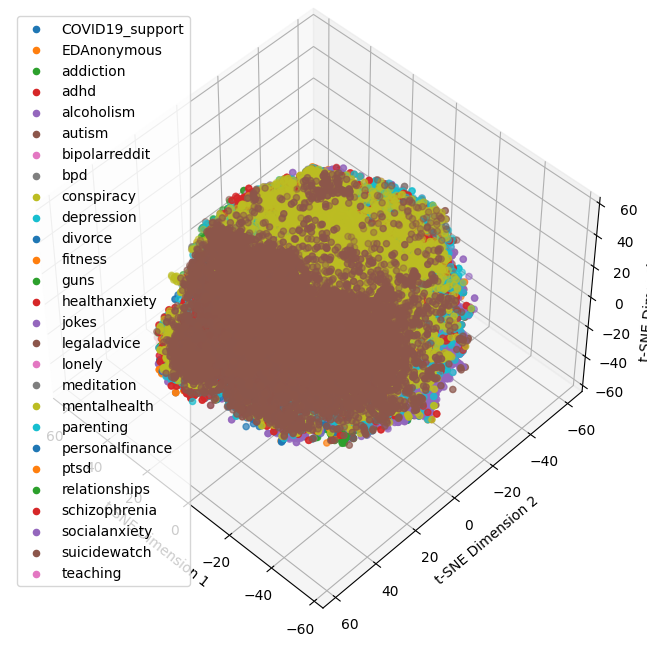

In [28]:
# Step 7: Plot the t-SNE results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for label in merged_df['subreddit_label'].unique():
    subset = merged_df[merged_df['subreddit_label'] == label]
    ax.scatter(
        X_tsne[subset.index, 0],
        X_tsne[subset.index, 1],
        X_tsne[subset.index, 2],
        label=label_encoder.inverse_transform([label])[0],
    )

ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
ax.legend()
plt.show()

In [29]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from wordcloud import WordCloud

In [31]:
sample_size = 100000
text_data_sample = merged_df['post'].dropna().sample(sample_size).str.cat(sep=' ')

In [32]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_sample)

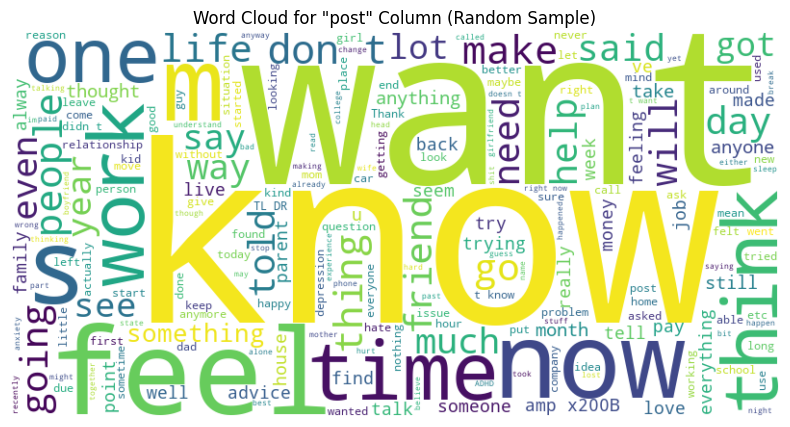

In [33]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for "post" Column (Random Sample)')
plt.show()

In [34]:
!pip install umap-learn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from umap import UMAP

In [36]:
# Separate features (excluding the target column, if applicable)
X = merged_df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

In [37]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [38]:
# Apply UMAP
sample_size = 100000  # Adjust the sample size as needed
umap = UMAP(n_components=2, min_dist=0.1, n_neighbors=15)  # Adjust parameters as needed
X_umap = umap.fit_transform(X_standardized[:sample_size])

In [39]:
# Create a DataFrame with the UMAP components
columns = [f'UMAP{i}' for i in range(1, X_umap.shape[1] + 1)]
umap_components_df = pd.DataFrame(data=X_umap, columns=columns)

In [40]:
# Concatenate the UMAP components with the original data
result_df = pd.concat([merged_df, umap_components_df], axis=1)

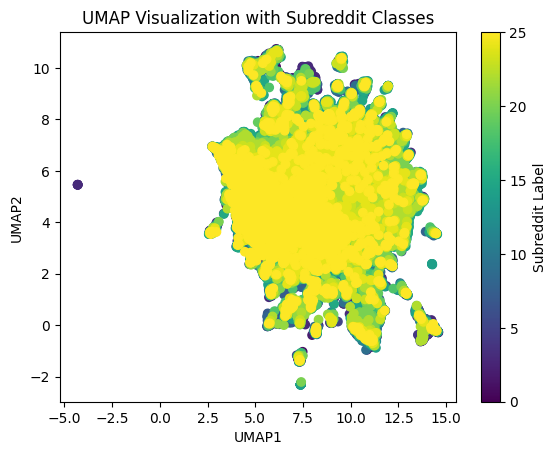

In [41]:
# Plot the UMAP visualization with different colors for each class
plt.scatter(result_df['UMAP1'], result_df['UMAP2'], c=result_df['subreddit_label'], cmap='viridis')
plt.title('UMAP Visualization with Subreddit Classes')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Subreddit Label')
plt.show()

In [42]:
# Preprocessing 

In [43]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruhit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [46]:
# Assuming you have a preprocess_text function defined
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

In [47]:
# Apply preprocessing to the 'post' column
text_data = merged_df['post'].astype(str)
text_data = text_data.apply(preprocess_text)

In [48]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

In [49]:
# Apply TF-IDF vectorization to the preprocessed 'post' column
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [50]:
# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [51]:
# Assuming your dataset has a column named 'subreddit' as the target variable
y = merged_df['subreddit']

In [52]:
# Drop 'subreddit' from the features
X = merged_df.drop(columns=['subreddit'])

In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

In [54]:
#Log Scalar

In [55]:
# Applying log scalar to tf-idf
tfidf_df_log_scaled = np.log1p(tfidf_df)

In [56]:
#Standard Scaler

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Initialize the StandardScaler
standard_scaler = StandardScaler(with_mean=False, with_std=True)

In [59]:
# Fit the scaler on the training data and transform both training and testing data
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [60]:
#MinMax Scaler

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

In [63]:
# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

In [64]:
# Fit the scaler on the training data and transform both training and testing data
X_train_minmax = minmax_scaler.fit_transform(X_train_array)
X_test_minmax = minmax_scaler.transform(X_test_array)

In [65]:
# Visualizing TFIDF

In [66]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import seaborn as sns

In [68]:
# Assuming you have a sparse DataFrame named tfidf_df
top_words = tfidf_df.sum().sort_values(ascending=False).head(20)

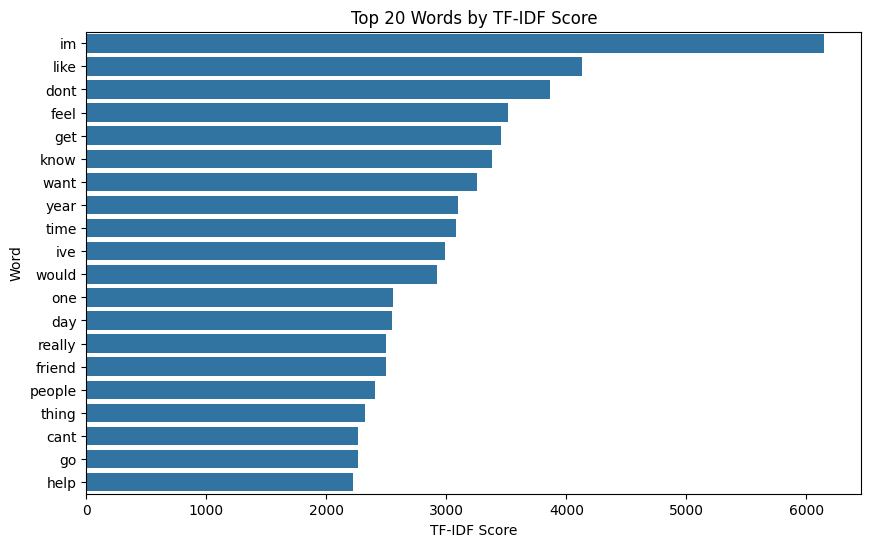

In [69]:
# Plot the top words
plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

In [70]:
# Different Classifiers

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [72]:
# Train Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [73]:
# Train Naive Bayes Classifier with MinMax Scaler
naive_bayes_classifier_minmax = MultinomialNB()
naive_bayes_classifier_minmax.fit(X_train_minmax, y_train)

MultinomialNB()

In [74]:
# Train Naive Bayes Classifier with StandardScaler
naive_bayes_classifier_standard = MultinomialNB()
naive_bayes_classifier_standard.fit(X_train_standard, y_train)

MultinomialNB()

In [75]:
# Predict and evaluate Naive Bayes Classifier
y_pred_nb = naive_bayes_classifier.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)

In [76]:
# Predict and evaluate Naive Bayes Classifier for min max scaler
nb_minmax_predictions = naive_bayes_classifier_minmax.predict(X_test_minmax)
nb_minmax_accuracy = metrics.accuracy_score(y_test, nb_minmax_predictions)

In [77]:
# Predict and evaluate Naive Bayes Classifier for standard scaler
nb_standard_predictions = naive_bayes_classifier_standard.predict(X_test_standard)
nb_standard_accuracy = metrics.accuracy_score(y_test, nb_standard_predictions)

In [78]:
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Accuracy with MinMaxScaler: {nb_minmax_accuracy}")
print(f"Naive Bayes Accuracy with StandardScaler: {nb_standard_accuracy}")

Naive Bayes Accuracy: 0.6221875913119704
Naive Bayes Accuracy with MinMaxScaler: 0.6366027077042953
Naive Bayes Accuracy with StandardScaler: 0.6175124184279731


In [79]:
# Train Logistic Regression Classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# Train Logistic Regression Classifier with MinMax Scaler
logistic_regression_minmax = LogisticRegression()
logistic_regression_minmax.fit(X_train_minmax, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
# Train Logistic Regression Classifier with StandardScaler
logistic_regression_standard = LogisticRegression()
logistic_regression_standard.fit(X_train_standard, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
# Predict and evaluate Logistic Regression Classifier
y_pred_lr = logistic_regression_classifier.predict(X_test)
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)

In [83]:
# Predict and evaluate Logistic Regression Classifier for min max scaler
lr_minmax_predictions = logistic_regression_minmax.predict(X_test_minmax)
lr_minmax_accuracy = metrics.accuracy_score(y_test, lr_minmax_predictions)

In [84]:
# Predict and evaluate Logistic Regression Classifier for standard scaler
lr_standard_predictions = logistic_regression_standard.predict(X_test_standard)
lr_standard_accuracy = metrics.accuracy_score(y_test, lr_standard_predictions)

In [85]:
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Accuracy with minmax: {lr_minmax_accuracy}")
print(f"Logistic Regression Accuracy with standard: {lr_standard_accuracy}")

Logistic Regression Accuracy: 0.7204636213109964
Logistic Regression Accuracy with minmax: 0.7213889159442876
Logistic Regression Accuracy with standard: 0.7034674198889647


In [86]:
# Train Random Forest Classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
# Train Random Forest Classifier with minmax
random_forest_classifier_minmax = RandomForestClassifier()
random_forest_classifier_minmax.fit(X_train_minmax, y_train)

RandomForestClassifier()

In [88]:
# Train Random Forest Classifier with standard scalar
random_forest_classifier_standard = RandomForestClassifier()
random_forest_classifier_standard.fit(X_train_standard, y_train)

RandomForestClassifier()

In [89]:
# Predict and evaluate Random Forest Classifier
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)

In [90]:
# Predict and evaluate Random Forest Classifier with minmax scalar
random_forest_classifier_minmax_predictions = random_forest_classifier_minmax.predict(X_test_minmax)
random_forest_classifier_minmax_accuracy = metrics.accuracy_score(y_test, random_forest_classifier_minmax_predictions)

In [91]:
# Predict and evaluate Random Forest Classifier with standard scalar
random_forest_classifier_standard_predictions = random_forest_classifier_standard.predict(X_test_standard)
random_forest_classifier_standard_accuracy = metrics.accuracy_score(y_test, random_forest_classifier_standard_predictions)

In [92]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Accuracy with minmax: {random_forest_classifier_minmax_accuracy}")
print(f"Random Forest Accuracy with standard: {random_forest_classifier_standard_accuracy}")

Random Forest Accuracy: 0.6695724164799844
Random Forest Accuracy with minmax: 0.6698646147852343
Random Forest Accuracy with standard: 0.6682088243888186


In [95]:
# Train Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [96]:
# Train Gradient Boosting Classifier with minmax
gradient_boosting_minmax_classifier = GradientBoostingClassifier()
gradient_boosting_minmax_classifier.fit(X_train_minmax, y_train)

GradientBoostingClassifier()

In [97]:
# Train Gradient Boosting Classifier with standard
gradient_boosting_standard_classifier = GradientBoostingClassifier()
gradient_boosting_standard_classifier.fit(X_train_standard, y_train)

GradientBoostingClassifier()

In [98]:
# Predict and evaluate Gradient Boosting Classifier
y_pred_gb = gradient_boosting_classifier.predict(X_test)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)

In [99]:
# Predict and evaluate Gradient Boosting Classifier with minmax
gradient_boosting_minmax_classifier_predictions = gradient_boosting_minmax_classifier.predict(X_test_minmax)
gradient_boosting_minmax_classifier_accuracy = metrics.accuracy_score(y_test, gradient_boosting_minmax_classifier_predictions)

In [100]:
# Predict and evaluate Gradient Boosting Classifier with minmax
gradient_boosting_standard_classifier_predictions = gradient_boosting_standard_classifier.predict(X_test_standard)
gradient_boosting_standard_classifier_accuracy = metrics.accuracy_score(y_test, gradient_boosting_standard_classifier_predictions)

In [101]:
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Accuracy with minmax: {gradient_boosting_minmax_classifier_accuracy}")
print(f"Gradient Boosting Accuracy with standard: {gradient_boosting_standard_classifier_accuracy}")

Gradient Boosting Accuracy: 0.6656277393591117
Gradient Boosting Accuracy with minmax: 0.6692802181747346
Gradient Boosting Accuracy with standard: 0.6667478328625694


In [93]:
# Visualizing the results

In [94]:
# Confusion matrix heatmap

In [95]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [96]:
# Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    metrics = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    print(f"{model_name} Confusion Matrix:")
    print(conf_matrix)
    
    print(f"\n{model_name} Weighted Precision, Recall, and F1 Score:")
    print(f"Precision: {metrics[0]}")
    print(f"Recall: {metrics[1]}")
    print(f"F1 Score: {metrics[2]}")
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    5    0    0    0    1
     1    2    0    0    0    0    0    0    0    0    0    1    0]
 [   0    7    0   12    1    0    0    0    3   83    0   23    0    0
     9   11    0    0    2    0    1    0   11    0    0    1    0]
 [   0    0    0   16    2    0    0    0    1   38    0    0    0    0
     1   11    0    0    1    1    1    0    8    0    0    0    0]
 [   0    0    0 1062    0    0    0    0    2  155    0    7    2    0
    32   62    1    1    8   10   11    0   19    0    5    2    0]
 [   0    0    0   19   78    0    0    0    0   73    0    2    0    0
    11   19    0    0    3    2    0    0   26    0    0    6    0]
 [   0    0    0   58    0    1    0    0    3   39    0    2    0    0
    13   22    0    0    4   19    3    0   14    0    0    0    0]
 [   0    0    0   34    0    0    0    1    1   53    0    0    0    0
     1    2    0    1    7    0    2    0    3    0    0  

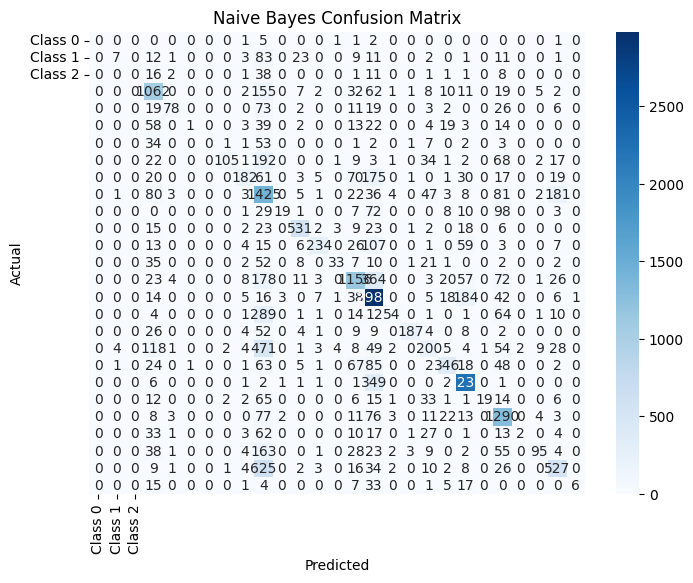

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes (MinMaxScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    3    0    0    0    1
     1    1    0    0    2    0    0    0    1    0    0    1    0]
 [   0   12    0   10    1    0    0    0    4   76    0   22    1    1
    10   10    0    1    2    1    1    0   10    0    0    2    0]
 [   0    0    0   18    3    0    0    0    1   35    0    0    1    0
     1    7    0    0    1    2    2    0    8    0    0    1    0]
 [   0    0    0 1069    0    0    0    0    8  139    0   10    4    2
    31   45    2    1   11   11   11    0   22    0    7    6    0]
 [   0    0    0   17  102    0    0    0    0   64    0    2    0    1
     8   14    0    0    3    2    1    0   20    0    0    5    0]
 [   0    0    0   61    0    2    0    0    4   28    0    2    1    0
    13   19    0    0    6   22    3    0   14    0    1    1    1]
 [   0    0    0   32    0    0    0    3    1   44    0    0    0    0
     1    2    1    1   13    0    3    0  

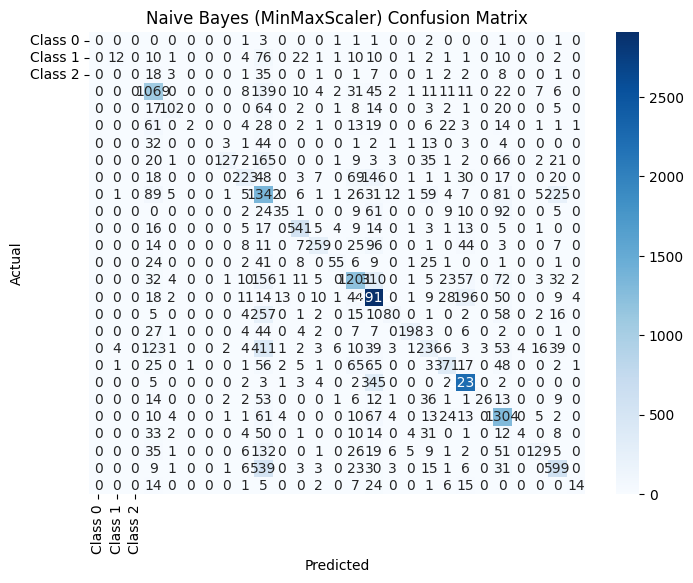

Naive Bayes (StandardScaler) Confusion Matrix:
[[   3    0    0    0    0    0    0    0    2    1    0    0    0    1
     0    0    0    0    1    1    0    0    0    0    1    1    0]
 [   2   86    0    2    5    3    5    3    6    4    0   13    0    6
     2    0    2    1    5    1    1    3    3    2    3    4    2]
 [   2    1   28    4   10    3    3    3    2    3    1    0    1    1
     0    1    0    2    4    3    0    2    2    2    0    0    2]
 [   6   28   18  848   11   52   49   18   20   40    3    9    9   23
    16   16   22   41   24   23    8    9    7   22   22   10   25]
 [   0    8   10    3  170    3    1    2    0    6    4    0    1    5
     3    0    4    1    1    1    1    2    3    3    2    4    1]
 [   1    3    3    9    0   61    4    6   10    5    2    3    3    1
     4    5    4    4    2   21    0    4    5    2    8    0    8]
 [   0    5    2    9    0    2   39    9    0   10    0    0    1    2
     0    1    2    3    8    0    0    3

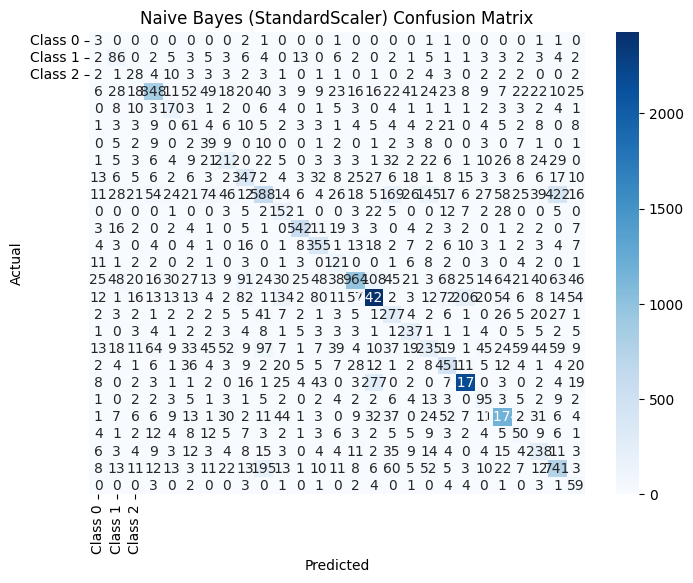

In [97]:
# For Naive Bayes
print_metrics("Naive Bayes", y_test, y_pred_nb)
print_metrics("Naive Bayes (MinMaxScaler)", y_test, nb_minmax_predictions)
print_metrics("Naive Bayes (StandardScaler)", y_test, nb_standard_predictions)

In [98]:
# For Logistic Regression

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    2    0    0    0    3
     1    2    0    0    2    0    0    0    0    0    0    1    0]
 [   0   52    0    5    3    0    0    1    7   29    0   19    1    1
    15    2    1    1   10    1    0    1    3    0    2    9    1]
 [   0    0    8   12    9    0    0    2    5   15    0    1    1    0
     8    4    0    0    5    2    0    0    1    0    1    6    0]
 [   0    7    0 1137    3    0    1    4   16   61    1    5    3    4
    50    8    3    5   19   11   10    0    8    5   14    4    0]
 [   0    1    0   11  156    1    0    1    1   18    1    1    2    2
    16    6    2    0    8    3    0    0    2    0    1    6    0]
 [   0    2    0   28    0   28    1    1    8   15    0    1    2    0
    16   11    4    1   10   31    3    1    2    2    8    1    2]
 [   0    3    0   13    0    1   11    3    3   28    0    0    1    0
     1    1    2    2   24    0    2    1    3    

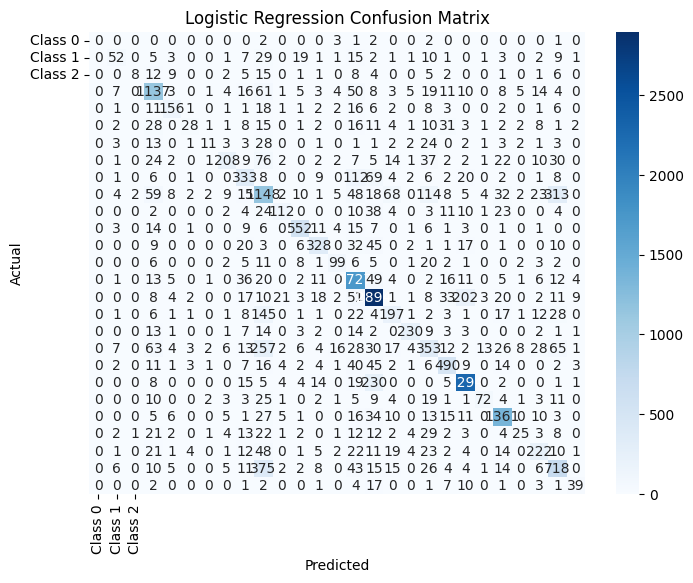

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression (MinMaxScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    2    0    0    0    3
     1    2    0    0    2    0    0    0    0    0    0    1    0]
 [   0   56    0    5    4    1    0    3    7   23    0   20    3    1
    14    1    1    1    8    0    0    1    3    0    2    9    1]
 [   0    0    8   11    9    0    0    2    4   13    0    1    2    0
     9    3    0    0    7    2    0    0    2    0    1    6    0]
 [   0    7    0 1135    3    0    1    6   16   63    1    5    3    4
    49    7    3    6   20   12    9    0    8    4   14    3    0]
 [   0    2    0   10  159    2    0    1    1   16    1    2    2    1
    16    6    2    0    7    3    0    0    2    0    0    6    0]
 [   0    2    1   30    0   31    1    2    7   13    0    1    2    0
    15   10    4    1   11   31    3    1    2    1    6    1    2]
 [   0    2    0   13    0    1   13    3    3   23    0    0    1    1
     2    1    2    2   26    0    

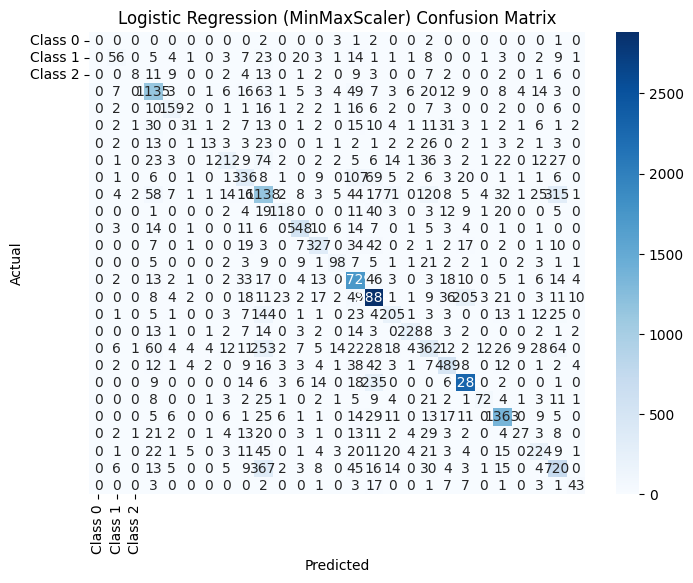

Logistic Regression (StandardScaler) Confusion Matrix:
[[   0    0    0    0    1    0    0    0    0    2    0    0    0    2
     1    1    0    0    2    1    0    0    0    0    0    1    0]
 [   1   59    0    7    5    1    2    6    6   23    0   13    2    2
    13    2    2    1    8    1    0    1    2    0    1    5    1]
 [   0    1   13    8   10    3    0    3    3    9    0    0    2    0
     6    3    0    1    4    2    0    1    1    4    1    5    0]
 [   0   12    3 1100    4    6   14    7   17   46    1    7    9   10
    38    7    8    8   24   12    6    1    7    7   19    5    1]
 [   0    5    4    6  171    1    1    1    2   10    1    4    2    1
     7    4    3    0    5    4    0    0    0    2    0    5    0]
 [   1    1    1   25    1   38    1    3    8   13    0    2    1    0
    12    7    3    1    8   27    2    4    2    5    6    1    5]
 [   0    1    0   12    1    2   20    5    1   19    0    0    1    1
     1    1    1    3   21    0  

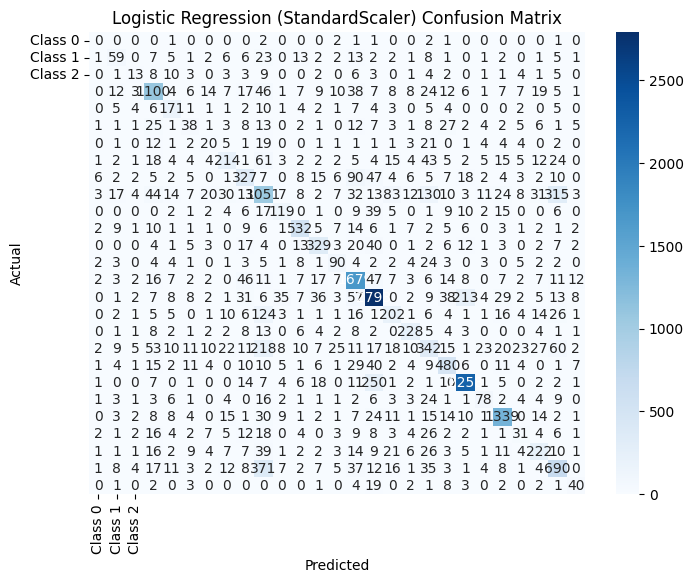

In [99]:
print_metrics("Logistic Regression", y_test, y_pred_lr)
print_metrics("Logistic Regression (MinMaxScaler)", y_test, lr_minmax_predictions)
print_metrics("Logistic Regression (StandardScaler)", y_test, lr_standard_predictions)

In [100]:
# For Random Forest 

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    5    0    0    0    0
     1    2    0    0    1    1    0    0    0    0    0    0    0]
 [   0    4    0    3    5    0    0    0    3   42    0   39    5    0
    20   13    2    0    2    2    3    1    7    0    1   12    0]
 [   0    0    0    5    4    0    0    0    3   24    0    1    1    0
    10   15    0    0    3    3    1    0    2    0    2    6    0]
 [   0    2    0 1184    2    1    0    0    7   59    0    9    6    0
    42   20    1    3    4    3   16    0   12    0    4    4    0]
 [   0    0    0    2  208    0    0    0    0    8    0    2    0    1
     8    2    0    0    0    2    4    0    0    0    0    2    0]
 [   0    0    0   21    0    4    0    1    3   30    0    5    2    0
    14   32    4    0    3   36    5    0    5    0    6    5    2]
 [   0    0    0   25    0    0    3    2    0   41    0    4    1    0
     2    9    0    0    3    1    1    0    5    0    3

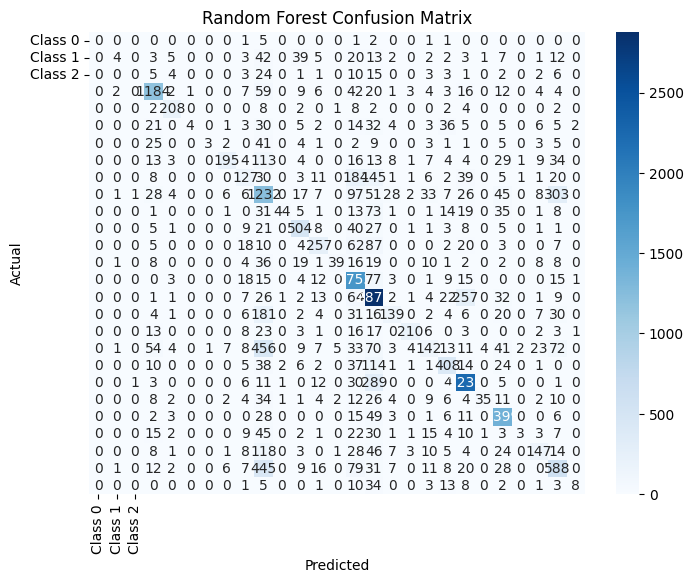

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (MinMaxScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    5    0    0    0    0
     1    2    0    0    0    1    0    0    0    0    0    1    0]
 [   0    5    0    5    5    0    0    0    4   48    0   40    2    0
    21   12    2    0    1    2    3    1    4    0    0    9    0]
 [   0    0    0    6    4    0    0    0    3   24    0    1    1    0
     8   18    1    0    1    3    0    0    3    0    2    5    0]
 [   0    0    0 1182    1    1    0    1    5   61    0    6    3    0
    45   28    1    3    4    2   12    0   13    2    3    6    0]
 [   0    0    0    2  207    0    0    0    0   16    0    2    0    0
     8    0    0    0    2    2    0    0    0    0    0    0    0]
 [   0    0    0   28    0    4    0    1    3   30    0    4    2    0
    17   29    4    0    6   34    1    0    1    0    8    5    1]
 [   0    1    0   23    0    0    3    2    1   43    0    4    0    0
     1    9    0    0    3    0    2    0

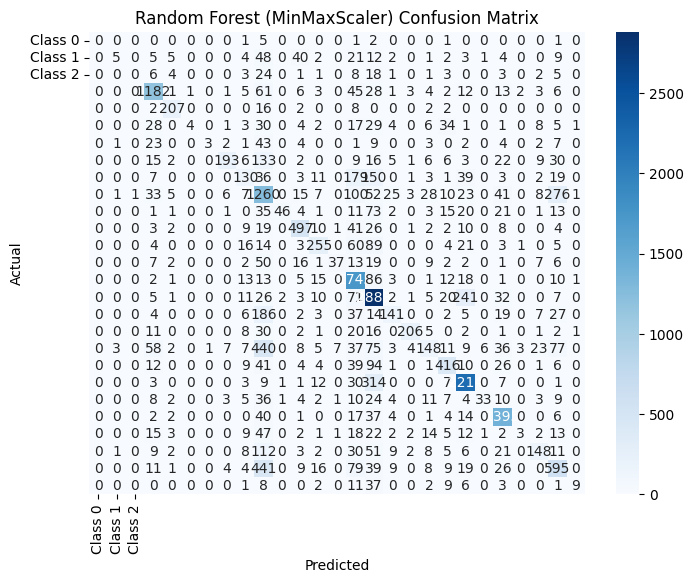

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (StandardScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    4    0    0    0    0
     1    3    0    0    1    0    0    0    0    0    0    1    0]
 [   0    2    0    1    5    0    0    0    7   48    0   42    0    0
    20   13    2    0    2    0    2    1    4    0    1   14    0]
 [   0    0    0    6    4    0    0    0    2   22    0    1    1    0
    12   12    0    0    6    5    1    0    2    0    1    5    0]
 [   0    0    0 1179    1    1    0    0    5   66    0    7    4    0
    41   31    1    3    3    2   14    0   10    0    5    6    0]
 [   0    0    0    2  209    0    0    0    0   16    0    2    0    0
     8    0    0    0    0    2    0    0    0    0    0    0    0]
 [   0    0    0   22    0    4    0    1    3   27    0    4    4    0
    15   32    3    0    5   39    4    0    4    0    6    3    2]
 [   0    0    0   21    0    0    3    2    3   42    0    3    0    0
     1    9    0    0    4    1    3   

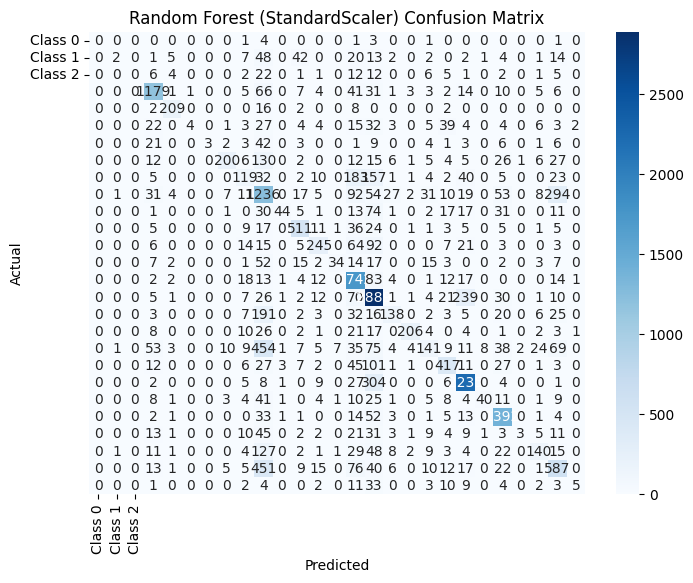

In [101]:
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("Random Forest (MinMaxScaler)", y_test, random_forest_classifier_minmax_predictions)
print_metrics("Random Forest (StandardScaler)", y_test, random_forest_classifier_standard_predictions)

Gradient Boosting Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    3    0    0    0    2
     1    2    0    0    1    0    0    0    0    0    1    1    0]
 [   0   35    1    4    6    0    2    1    2   22    0   31    2    2
    15   12    2    0    6    1    0    4    4    1    2    8    1]
 [   0    1    5    7    9    1    0    1    2   15    0    0    0    0
    11   12    1    0    6    3    0    0    1    1    1    3    0]
 [   1    4    2 1019   10   12    4    1    4   74    5   11    1    2
    73   53    4    6   17   12   12    1   18    8   12   11    2]
 [   2    2    0    3  165    0    0    0    1   19    0    0    0    2
    16   14    1    0    2    2    0    2    2    1    1    4    0]
 [   0    3    1   23    1    8    0    2    7   17    1    4    1    1
    19   20    7    2   15   29    1    1    2    2    8    0    3]
 [   0    4    0   20    0    1   15    4    0   16    0    1    0    1
     3    4    2    0   21    0    0    0    4    4 

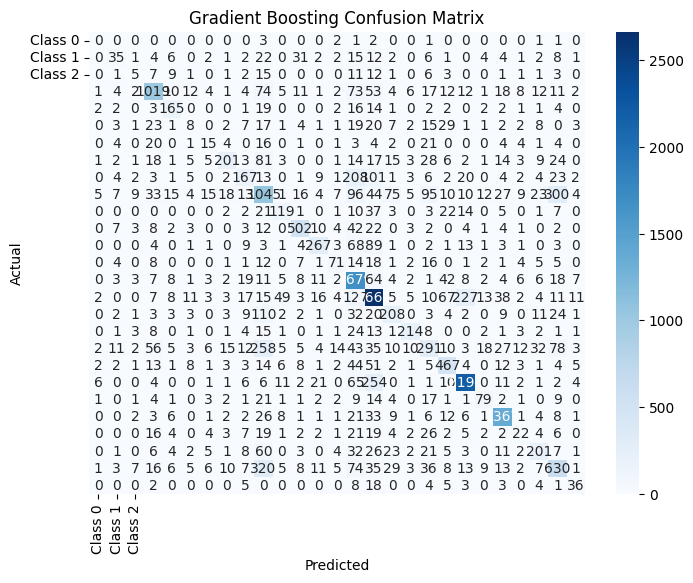

Gradient Boosting (MinMaxScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    2    0    0    0    3
     1    2    0    0    1    0    0    0    0    0    1    1    0]
 [   1   35    1    5    6    0    0    2    3   21    0   31    1    1
    16   13    2    0    6    1    0    3    4    0    2    9    1]
 [   0    1    6    8    9    1    0    1    2   13    0    0    0    0
    11   11    1    0    8    3    0    0    1    0    1    3    0]
 [   0    4    2 1028    6   10    3    4    5   79    1   11    1    4
    72   48    5    6   17   12   14    0   20    7   10    8    2]
 [   0    2    0    3  166    0    0    0    1   15    0    0    0    3
    14   16    2    0    3    2    0    3    2    0    2    5    0]
 [   0    3    0   22    1    9    0    4    8   16    1    4    1    1
    19   21    6    1   16   27    1    1    2    2    9    0    3]
 [   0    5    0   21    0    1   14    4    1   18    0    0    0    1
     3    4    1    0   19    0    0 

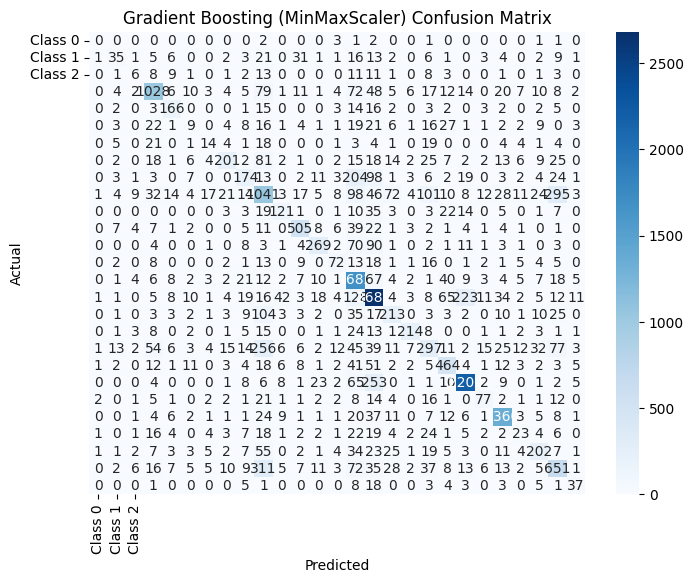

Gradient Boosting (StandardScaler) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    3    0    0    0    2
     1    2    0    0    1    0    0    0    0    0    1    1    0]
 [   0   33    1    5    6    0    0    2    3   21    0   32    1    2
    16   13    2    1    6    1    0    3    4    0    2    9    1]
 [   0    1    4    8   10    1    0    1    2   14    0    0    0    0
    11   11    1    0    8    2    0    1    1    0    1    3    0]
 [   0    4    3 1026    8   10    5    2    5   77    1   11    1    2
    72   50    4    6   14   13   14    0   18    8   11   11    3]
 [   0    2    0    3  163    0    0    0    1   18    0    0    0    3
    12   16    2    0    2    3    2    2    4    0    2    4    0]
 [   0    3    0   23    1    8    0    4    5   18    1    4    1    1
    22   19    7    1   14   29    1    1    1    2    9    0    3]
 [   0    4    0   19    0    1   14    5    1   16    0    1    0    1
     3    4    1    0   20    0    

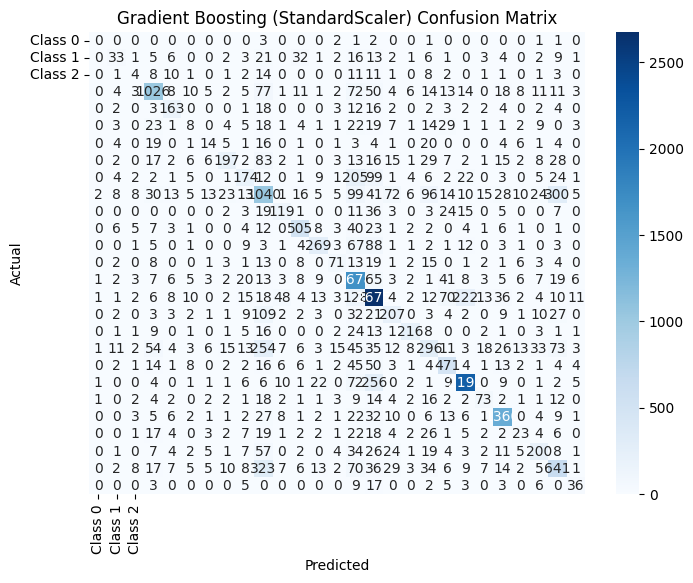

In [111]:
# For Gradient Boost Algorithm
print_metrics("Gradient Boosting", y_test, y_pred_gb)
print_metrics("Gradient Boosting (MinMaxScaler)", y_test, gradient_boosting_minmax_classifier_predictions)
print_metrics("Gradient Boosting (StandardScaler)", y_test, gradient_boosting_standard_classifier_predictions)

In [102]:
# Model Comparison Bar Chart 

In [103]:
import matplotlib.pyplot as plt

In [104]:
# Model names and accuracies
model_names = ['Naive Bayes', 'Naive Bayes(MinMax)', 'Naive Bayes(StandardScaler)']
accuracies = [accuracy_nb, nb_minmax_accuracy, nb_standard_accuracy]

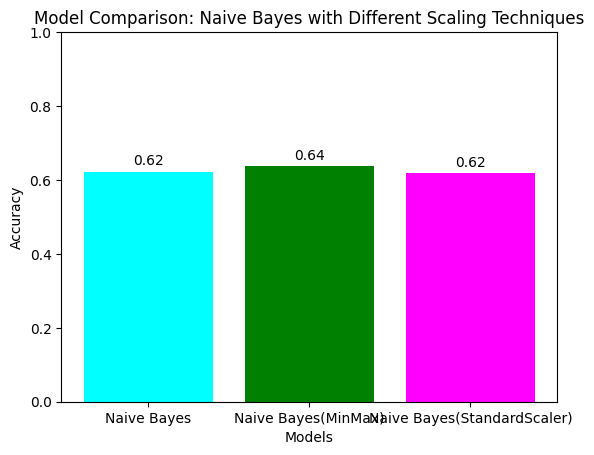

In [105]:
# Plotting the bar chart
plt.bar(model_names, accuracies, color=['cyan', 'green', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Naive Bayes with Different Scaling Techniques')

# Annotate the bars with their respective accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to match accuracy range (0 to 1)
plt.show()

In [106]:
# For Logistic Regression
models = ['Logistic Regression', 'Logistic Regression (MinMax)', 'Logistic Regression (Standard)']
accuracies = [accuracy_lr, lr_minmax_accuracy, lr_standard_accuracy]

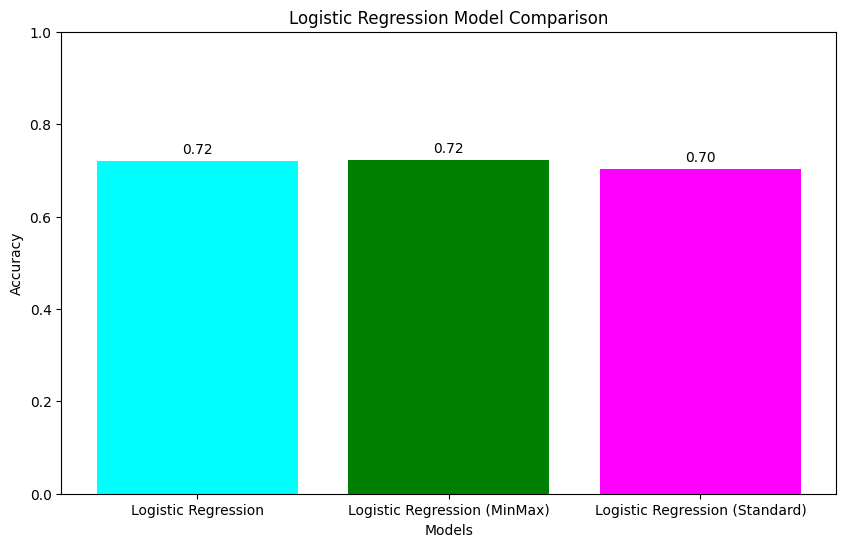

In [107]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['cyan', 'green', 'magenta'])
plt.title('Logistic Regression Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Annotate the bars with their respective accuracy values
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy percentage
plt.show()

In [108]:
# For Random Forest
models_rf = ['Random Forest', 'Random Forest (MinMax)', 'Random Forest (Standard)']
accuracies_rf = [accuracy_rf, random_forest_classifier_minmax_accuracy, random_forest_classifier_standard_accuracy]

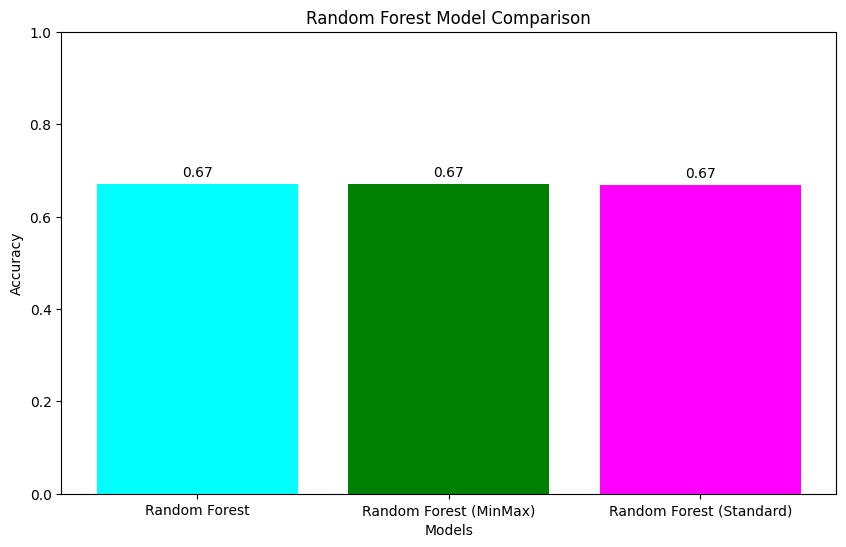

In [109]:
# Plotting
plt.figure(figsize=(10, 6))
bars_rf = plt.bar(models_rf, accuracies_rf, color=['cyan', 'green', 'magenta'])
plt.title('Random Forest Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy percentage

# Annotate the bars with their respective accuracy values for Random Forest
for bar_rf, accuracy_rf in zip(bars_rf, accuracies_rf):
    plt.text(bar_rf.get_x() + bar_rf.get_width() / 2, bar_rf.get_height() + 0.01, f'{accuracy_rf:.2f}', 
             ha='center', va='bottom')

plt.show()

In [120]:
# For Gradient Boosting Algorithm 

# Model names and accuracies for Gradient Boosting
model_names_gb = ['Gradient Boosting', 'Gradient Boosting(MinMax)', 'Gradient Boosting(StandardScaler)']
accuracies_gb = [accuracy_gb, gradient_boosting_minmax_classifier_accuracy, gradient_boosting_standard_classifier_accuracy]

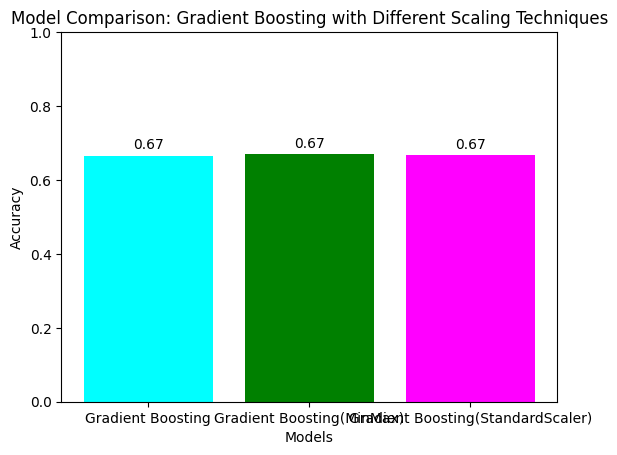

In [121]:
# Plotting the bar chart for Gradient Boosting
plt.bar(model_names_gb, accuracies_gb, color=['cyan', 'green', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Gradient Boosting with Different Scaling Techniques')

# Annotate the bars with their respective accuracy values
for i, accuracy_gb in enumerate(accuracies_gb):
    plt.text(i, accuracy_gb + 0.01, f'{accuracy_gb:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to match accuracy range (0 to 1)
plt.show()

In [110]:
# Grid Search hyper parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV 

In [112]:
# Naive Bayes Classifier
naive_bayes_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Adjust alpha values as needed
}
naive_bayes_classifier = MultinomialNB()
naive_bayes_grid = GridSearchCV(naive_bayes_classifier, naive_bayes_param_grid, cv=5)
naive_bayes_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]})

In [113]:
# Logistic Regression Classifier
logistic_regression_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust C values as needed
}

logistic_regression_classifier = LogisticRegression()
logistic_regression_grid = GridSearchCV(logistic_regression_classifier, logistic_regression_param_grid, cv=5)
logistic_regression_grid.fit(X_train, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
# Random Forest Classifier
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees as needed
    'max_depth': [None, 10, 20],  # Adjust max depth as needed
}

random_forest_classifier = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest_classifier, random_forest_param_grid, cv=5)
random_forest_grid.fit(X_train, y_train)

In [120]:
# Get the best hyperparameters for each classifier
best_naive_bayes_params_grid = naive_bayes_grid.best_params_
best_logistic_regression_params_grid = logistic_regression_grid.best_params_
#best_random_forest_params_grid = random_forest_grid.best_params_

In [121]:
# Use the best hyperparameters to create the final models
final_naive_bayes_model_grid = MultinomialNB(**best_naive_bayes_params_grid)
final_logistic_regression_model_grid = LogisticRegression(**best_logistic_regression_params_grid)
#final_random_forest_model_grid = RandomForestClassifier(**best_random_forest_params_grid)

In [122]:
# Fit the final models on the training data
final_naive_bayes_model_grid.fit(X_train, y_train)
final_logistic_regression_model_grid.fit(X_train, y_train)
#final_random_forest_model_grid.fit(X_train, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [123]:
# Evaluate the final models on the test set
naive_bayes_accuracy_grid = final_naive_bayes_model_grid.score(X_test, y_test)
logistic_regression_accuracy_grid = final_logistic_regression_model_grid.score(X_test, y_test)
#random_forest_accuracy_grid = final_random_forest_model_grid.score(X_test, y_test)

In [124]:
# Print the final accuracies
print(f"Final Naive Bayes Accuracy for Grid Search: {naive_bayes_accuracy_grid}")
print(f"Final Logistic Regression Accuracy for Grid Search: {logistic_regression_accuracy_grid}")
#print(f"Final Random Forest Accuracy for Grid Search: {random_forest_accuracy_grid}")

Final Naive Bayes Accuracy for Grid Search: 0.6280802571345087
Final Logistic Regression Accuracy for Grid Search: 0.7204636213109964


In [114]:
# Random Search hyper parameter tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [116]:
# Naive Bayes Classifier
naive_bayes_param_dist = {
    'alpha': uniform(0.1, 2.0),  # Adjust the range for alpha values as needed
}

naive_bayes_classifier = MultinomialNB()
naive_bayes_random = RandomizedSearchCV(naive_bayes_classifier, naive_bayes_param_dist, n_iter=10, cv=5, random_state=42)
naive_bayes_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000216FDD2D7F0>},
                   random_state=42)

In [117]:
# Logistic Regression Classifier
logistic_regression_param_dist = {
    'C': uniform(0.001, 100),  # Adjust the range for C values as needed
}

logistic_regression_classifier = LogisticRegression()
logistic_regression_random = RandomizedSearchCV(logistic_regression_classifier, logistic_regression_param_dist, n_iter=10, cv=5, random_state=42)
logistic_regression_random.fit(X_train, y_train)


c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000216FDD2DD30>},
                   random_state=42)

In [ ]:
# Random Forest Classifier
random_forest_param_dist = {
    'n_estimators': randint(50, 200),  # Adjust the range for the number of trees
    'max_depth': [None, 10, 20],  # Adjust max depth as needed
}

random_forest_classifier = RandomForestClassifier()
random_forest_random = RandomizedSearchCV(random_forest_classifier, random_forest_param_dist, n_iter=10, cv=5, random_state=42)
random_forest_random.fit(X_train, y_train)


In [125]:
# Get the best hyperparameters for each classifier
best_naive_bayes_params_random = naive_bayes_random.best_params_
best_logistic_regression_params_random = logistic_regression_random.best_params_
#best_random_forest_params_random = random_forest_random.best_params_

In [126]:
# Use the best hyperparameters to create the final models
final_naive_bayes_model_random = MultinomialNB(**best_naive_bayes_params_random)
final_logistic_regression_model_random = LogisticRegression(**best_logistic_regression_params_random)
#final_random_forest_model_random = RandomForestClassifier(**best_random_forest_params_random)

In [127]:
# Fit the final models on the training data
final_naive_bayes_model_random.fit(X_train, y_train)
final_logistic_regression_model_random.fit(X_train, y_train)
#final_random_forest_model_random.fit(X_train, y_train)

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5.809361216819947)

In [128]:
# Evaluate the final models on the test set
naive_bayes_accuracy_random = final_naive_bayes_model_random.score(X_test, y_test)
logistic_regression_accuracy_random = final_logistic_regression_model_random.score(X_test, y_test)
#random_forest_accuracy_random = final_random_forest_model_random.score(X_test, y_test)

In [129]:
# Print the final accuracies
print(f"Final Naive Bayes Accuracy for Random Search: {naive_bayes_accuracy_random}")
print(f"Final Logistic Regression Accuracy for Random Search: {logistic_regression_accuracy_random}")
#print(f"Final Random Forest Accuracy for Random Search: {random_forest_accuracy_random}")

Final Naive Bayes Accuracy for Random Search: 0.6274471608064673
Final Logistic Regression Accuracy for Random Search: 0.7200253238531217


In [130]:
# Function to print metrics
def print_metrics(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Confusion Matrix:")
    print(conf_matrix)
    
    print(f"\n{model_name} Weighted Precision, Recall, and F1 Score:")
    print(f"Precision: {metrics[0]}")
    print(f"Recall: {metrics[1]}")
    print(f"F1 Score: {metrics[2]}")
    print("\n")

In [131]:
# Naive Bayes - Grid Search
print_metrics("Naive Bayes (Grid Search)", final_naive_bayes_model_grid, X_test, y_test)

Naive Bayes (Grid Search) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    5    0    0    0    1
     1    2    0    0    0    0    0    0    0    0    0    1    0]
 [   0   13    0   11    1    0    0    0    3   77    0   22    0    1
     9   11    0    0    2    0    1    0   11    0    0    2    0]
 [   0    0    0   16    3    0    0    0    1   36    0    0    1    0
     1   11    0    0    1    1    1    0    8    0    0    0    0]
 [   0    3    0 1064    0    0    0    0    3  150    0    6    2    3
    28   61    2    1    8   11    9    0   19    0    5    4    0]
 [   0    0    0   19   85    0    0    0    0   71    0    2    0    1
    11   18    0    0    3    1    0    0   24    0    0    4    0]
 [   0    0    0   59    0    2    0    0    3   38    0    2    0    0
    13   22    0    0    4   18    3    0   14    0    0    0    0]
 [   0    0    0   33    0    0    1    2    1   51    0    0    0    0
     1    2    0    1    8    0    2    0   

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# Naive Bayes - Randomized Search
print_metrics("Naive Bayes (Randomized Search)", final_naive_bayes_model_random, X_test, y_test)

Naive Bayes (Randomized Search) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    1    5    0    0    0    1
     1    2    0    0    0    0    0    0    0    0    0    1    0]
 [   0   13    0   11    1    0    0    0    3   77    0   22    0    1
     9   11    0    0    2    0    1    0   11    0    0    2    0]
 [   0    0    0   16    3    0    0    0    1   36    0    0    1    0
     1   11    0    0    1    1    1    0    8    0    0    0    0]
 [   0    1    0 1065    0    0    0    0    3  151    0    7    2    2
    28   61    2    1    8   11    9    0   19    0    5    4    0]
 [   0    0    0   19   84    0    0    0    0   71    0    2    0    1
    11   18    0    0    3    1    0    0   25    0    0    4    0]
 [   0    0    0   59    0    2    0    0    3   38    0    2    0    0
    13   22    0    0    4   18    3    0   14    0    0    0    0]
 [   0    0    0   34    0    0    0    2    1   51    0    0    0    0
     1    2    0    1    8    0    2  

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
# Logistic Regression - Grid Search
print_metrics("Logistic Regression (Grid Search)", final_logistic_regression_model_grid, X_test, y_test)

Logistic Regression (Grid Search) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    2    0    0    0    3
     1    2    0    0    2    0    0    0    0    0    0    1    0]
 [   0   52    0    5    3    0    0    1    7   29    0   19    1    1
    15    2    1    1   10    1    0    1    3    0    2    9    1]
 [   0    0    8   12    9    0    0    2    5   15    0    1    1    0
     8    4    0    0    5    2    0    0    1    0    1    6    0]
 [   0    7    0 1137    3    0    1    4   16   61    1    5    3    4
    50    8    3    5   19   11   10    0    8    5   14    4    0]
 [   0    1    0   11  156    1    0    1    1   18    1    1    2    2
    16    6    2    0    8    3    0    0    2    0    1    6    0]
 [   0    2    0   28    0   28    1    1    8   15    0    1    2    0
    16   11    4    1   10   31    3    1    2    2    8    1    2]
 [   0    3    0   13    0    1   11    3    3   28    0    0    1    0
     1    1    2    2   24    0    2

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
# Logistic Regression - Randomized Search
print_metrics("Logistic Regression (Randomized Search)", final_logistic_regression_model_random, X_test, y_test)

Logistic Regression (Randomized Search) Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    2    0    0    0    3
     1    1    0    0    2    1    0    0    0    0    0    1    0]
 [   0   63    0    4    4    1    0    4    7   23    0   14    1    2
    14    2    1    1    9    0    0    1    3    0    1    9    0]
 [   0    0   11    8    9    0    0    3    4   11    0    1    2    0
     6    4    1    0    9    1    0    0    1    1    2    6    0]
 [   0    8    1 1112    6    2    7    5   14   59    1    9    6    4
    40    6    4    7   30   14    8    0    7    5   19    5    0]
 [   0    2    0    8  161    2    0    1    1   13    1    2    2    1
    16    6    2    0    7    4    0    0    2    1    1    6    0]
 [   0    1    1   27    0   35    1    2    8   15    0    3    0    0
    10   10    4    0   13   27    3    2    1    3    8    2    2]
 [   0    3    0   11    0    1   21    4    2   23    0    0    1    1
     0    1    0    2   24    

c:\users\ruhit\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest - Grid Search
print_metrics("Random Forest (Grid Search)", final_random_forest_model_grid, X_test, y_test)

In [ ]:
# Random Forest - Randomized Search
print_metrics("Random Forest (Randomized Search)", final_random_forest_model_random, X_test, y_test)

In [ ]:
# Bar chart for Grid Search Hyper Parameter Tuning
model_names_grid = ['Naive Bayes (Grid Search)', 'Logistic Regression (Grid Search)', 'Random Forest (Grid Search)']
accuracies_grid = [naive_bayes_accuracy_grid, logistic_regression_accuracy_grid, random_forest_accuracy_grid]

In [ ]:
# Plotting the bar chart for Grid Search
plt.bar(model_names_grid, accuracies_grid, color=['cyan', 'green', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Grid Search')

# Annotate the bars with their respective accuracy values
for i, accuracy_grid in enumerate(accuracies_grid):
    plt.text(i, accuracy_grid + 0.01, f'{accuracy_grid:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy range (0 to 1)
plt.show()

In [ ]:
# Bar Chart For Random Search Hyper Parameter Tuning
# Model names and accuracies for Random Search
model_names_random = ['Naive Bayes (Random Search)', 'Logistic Regression (Random Search)', 'Random Forest (Random Search)']
accuracies_random = [naive_bayes_accuracy_random, logistic_regression_accuracy_random, random_forest_accuracy_random]

In [ ]:
# Plotting the bar chart for Random Search
plt.bar(model_names_random, accuracies_random, color=['cyan', 'green', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Random Search')

# Annotate the bars with their respective accuracy values
for i, accuracy_random in enumerate(accuracies_random):
    plt.text(i, accuracy_random + 0.01, f'{accuracy_random:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy range (0 to 1)
plt.show()

In [ ]:
# Combine both lists
model_names_combined = model_names_grid + model_names_random
accuracies_combined = accuracies_grid + accuracies_random

In [ ]:
# Plotting the bar chart for all classifiers
plt.figure(figsize=(12, 6))
plt.bar(model_names_combined, accuracies_combined, color=['cyan', 'green', 'magenta'] * 2)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Grid Search vs Randomized Search')

# Annotate the bars with their respective accuracy values (with 5 digits after the decimal point)
for i, accuracy_combined in enumerate(accuracies_combined):
    plt.text(i, accuracy_combined + 0.01, f'{accuracy_combined:.5f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy range (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()